# SET/RESET final conductance sweeps

We test the effect of pulses with different VBL/VSL on final conductance gf.

In [4]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd

# Set VDDIO
vddio = 33


## SET sweep

In [18]:
# Load SET sweep data
setdata = pd.read_csv(f"../data/sweep/setsweep25.csv.gz", delimiter="\t", names=["addr", "t", "vwl", "vbl", "pw"] + [f"gi[{i}]" for i in range(16)] + [f"gf[{i}]" for i in range(16)])
setdata = pd.concat([setdata[["addr","t","vwl","vbl","pw",f"gi[{i}]",f"gf[{i}]"]].rename(columns={f"gi[{i}]" : "gi", f"gf[{i}]" : "gf"}) for i in range(16)])
setdata

,addr,t,vwl,vbl,pw,gi,gf
0,58881,1.685559e+09,0,0,1,6,6
1,58292,1.685559e+09,0,4,1,9,9
2,30216,1.685559e+09,0,8,1,4,4
3,44022,1.685559e+09,0,12,1,5,4
4,43578,1.685559e+09,0,16,1,5,31
...,...,...,...,...,...,...,...
136825,22753,1.685598e+09,226,8,16,35,37
136826,50171,1.685598e+09,226,12,16,30,38
136827,21265,1.685598e+09,226,16,16,5,42
136828,6292,1.685598e+09,226,20,16,7,49


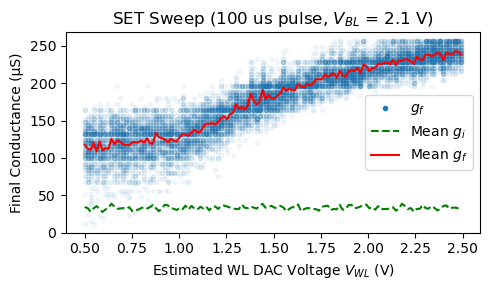

In [57]:
# Plot SET sweep
d = setdata[(setdata["gi"].isin(range(1,20))) & (setdata["pw"] == 2048) & (setdata["vbl"] == 20)][["vwl","vbl","pw","gi","gf"]]
d["vwl"] = (d["vwl"]*2/255) + 0.5
fig = plt.figure(figsize=(5,3))
ax = plt.axes()
ax.scatter(d["vwl"], d["gf"]*4, marker=".", alpha=0.05, label="$g_f$")
(d.groupby("vwl")["gi"].mean() * 4).plot(color="green", linestyle="--", label="Mean $g_i$")
(d.groupby("vwl")["gf"].mean() * 4).plot(color="red", label="Mean $g_f$")
ax.set_title(f"SET Sweep (100 us pulse, $V_{{BL}}$ = 2.1 V)", y=1)
ax.set_xlabel("Estimated WL DAC Voltage $V_{WL}$ (V)")
ax.set_ylabel("Final Conductance (μS)")
legend = ax.legend()
for lh in legend.legend_handles: 
    lh.set_alpha(1)
plt.tight_layout()
plt.savefig(f"figs/setsweep{vddio}_wl_100us.png", dpi=300)

### RESET sweep

In [7]:
# Load RESET sweep data
resetdata = pd.read_csv(f"../data/sweep/resetsweep25.csv.gz", delimiter="\t", names=["addr", "t", "vwl", "vsl", "pw"] + [f"gi[{i}]" for i in range(48)] + [f"gf[{i}]" for i in range(48)])
resetdata = pd.concat([resetdata[["addr","t","vwl","vsl","pw",f"gi[{i}]",f"gf[{i}]"]].rename(columns={f"gi[{i}]" : "gi", f"gf[{i}]" : "gf"}) for i in range(48)])
resetdata

,addr,t,vwl,vsl,pw,gi,gf
0,33364,1.685571e+09,0,0,1,47.0,NaN
1,41819,1.685571e+09,0,4,1,47.0,NaN
2,17308,1.685571e+09,0,8,1,5.0,NaN
3,62601,1.685571e+09,0,12,1,44.0,NaN
4,7748,1.685571e+09,0,16,1,8.0,NaN
...,...,...,...,...,...,...,...
230461,2176,1.685593e+09,226,8,16,NaN,NaN
230462,44071,1.685593e+09,226,12,16,NaN,NaN
230463,32791,1.685593e+09,226,16,16,NaN,NaN
230464,63721,1.685593e+09,226,20,16,NaN,NaN


In [8]:
# Plot RESET sweep
d = resetdata[(resetdata["gi"].isin(range(48,64))) & (resetdata["pw"] == 1) & (resetdata["vwl"] == 0)][["vwl","vsl","pw","gi","gf"]].sample(100000)
d["vsl"] = (d["vsl"]*2.1/31) + 1
fig = plt.figure(figsize=(3,3))
ax = plt.axes()
ax.scatter(d["vsl"], d["gf"]*4, marker=".", alpha=0.002, label="$g_f$")
(d.groupby("vsl")["gi"].mean() * 4).plot(color="green", linestyle="--", label="Mean $g_i$")
(d.groupby("vsl")["gf"].mean() * 4).plot(color="red", label="Mean $g_f$")
ax.set_title(f"RESET Sweep (10 ns pulse)", y=1)
ax.set_xlabel("Estimated SL DAC Voltage $V_{SL}$ (V)")
ax.set_ylabel("Final Conductance (μS)")
legend = ax.legend()
for lh in legend.legend_handles: 
    lh.set_alpha(1)
plt.tight_layout()
plt.savefig(f"figs/resetsweep{vddio}_sl.png", dpi=300)

ValueError: Cannot take a larger sample than population when 'replace=False'